In [1]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
pd.set_option("display.max_columns", 50)

In [3]:
# Restore model
number = 2332
sess = tf.Session()
saver = tf.train.import_meta_graph('models/attn-%s.meta'%str(number))
saver.restore(sess=sess, save_path='models/attn-%s'%str(number))
graph = tf.get_default_graph()

INFO:tensorflow:Restoring parameters from models/attn-2332


In [4]:
# Test data I used, 0 is normal and 1 is anomaly

Counter({0: 19906, 1: 94})

In [7]:
# Get tensors
input_x = graph.get_tensor_by_name('input/features:0')
input_dev = graph.get_tensor_by_name('input/dev_type:0')
is_training = graph.get_tensor_by_name('input/is_training:0')
output_proba = graph.get_tensor_by_name('error/Sigmoid:0')
attention_matrix = graph.get_tensor_by_name('scaling_attention/Relu:0') 

In [8]:
# Output probability
prediction = sess.run(output_proba, feed_dict={input_x: 'input features here',
                                           input_dev: 'input device type here',
                                           is_training: False})

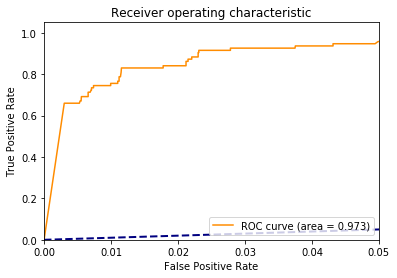

In [9]:
# Draw ROC
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

def auc_roc(y_pred, y_test):
    auc = roc_auc_score(y_true=y_test, y_score=y_pred)
    fprs, tprs, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    return auc, fprs, tprs, thresholds

import matplotlib.pyplot as pyplot
pyplot.rcParams['savefig.dpi'] = 300  # pixel
pyplot.rcParams['figure.dpi'] = 300  # resolution
pyplot.rcParams["figure.figsize"] = [1,1] # figure size

def plot_roc_curve(fprs, tprs, auc, x_axis = 1, plt = pyplot):

    plt.plot(fprs, tprs, color="darkorange", label='ROC curve (area = %0.3f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, x_axis])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
# calculate auc, false positive rates and etc.
auc, fprs, tprs, thresholds = auc_roc(y_pred=prediction, y_test=dataset.test_set['y'][0:20000])

# plot roc curve
plot_roc_curve(fprs, tprs, auc, x_axis=0.05)

accuracy: 0.97225

precision: 0.1358609794628752

recall: 0.9148936170212766

false positive rate: 0.027479152014468



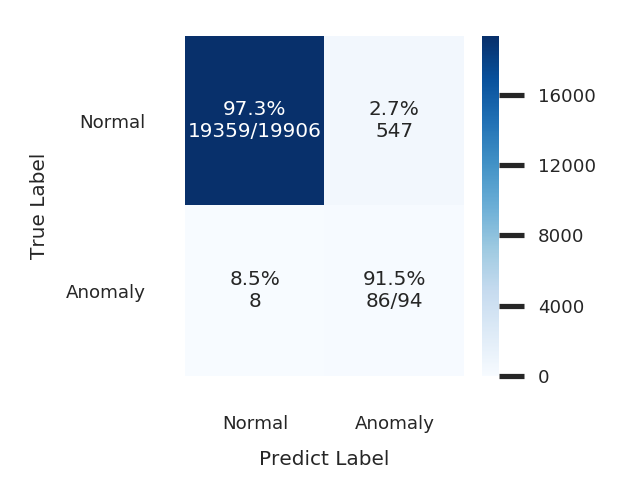

In [10]:
# move threshold from 0.9 to 1 to see the change of fpr, acc and etc.
threshold = 0.9

accuracy: 0.9775

precision: 0.1576923076923077

recall: 0.8723404255319149

false positive rate: 0.022003416055460665



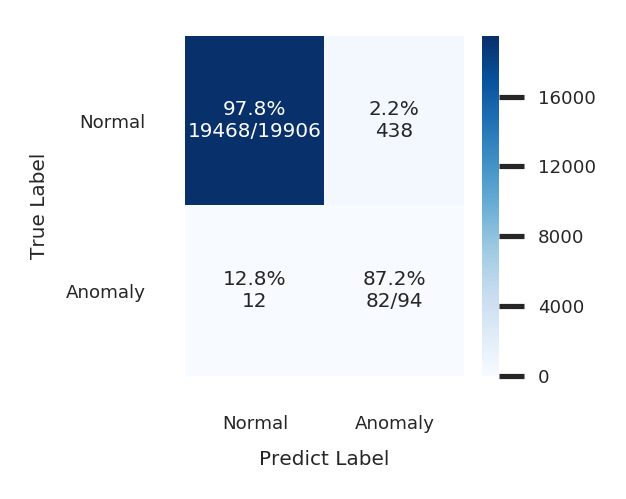

In [11]:
# move threshold from 0.9 to 1 to see the change of fpr, acc and etc.
threshold = 0.99

accuracy: 0.9894

precision: 0.2713178294573643

recall: 0.7446808510638298

false positive rate: 0.00944438862654476



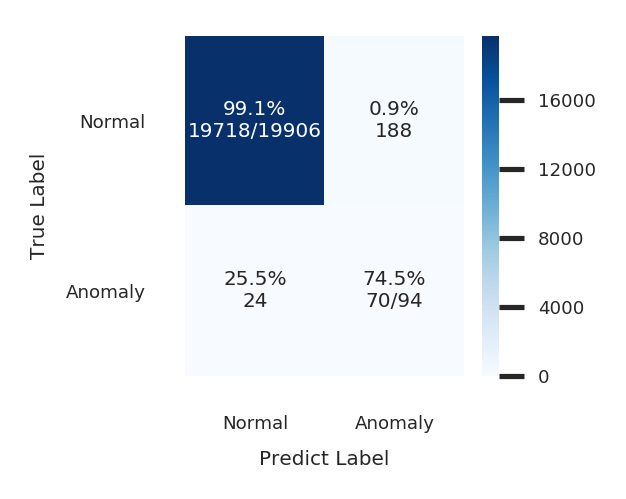

In [12]:
# move threshold from 0.9 to 1 to see the change of fpr, acc and etc.
threshold = 0.999

accuracy: 0.991

precision: 0.30973451327433627

recall: 0.7446808510638298

false positive rate: 0.007836833115643524



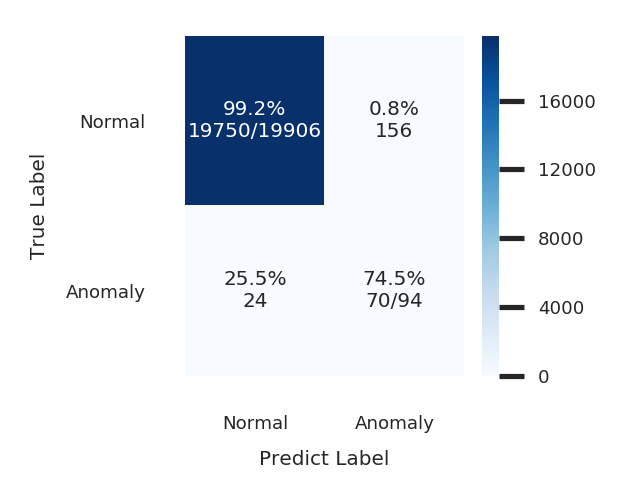

In [13]:
# move threshold from 0.9 to 1 to see the change of fpr, acc and etc.
threshold = 0.9999

accuracy: 0.9928

precision: 0.3611111111111111

recall: 0.6914893617021277

false positive rate: 0.005777152617301316



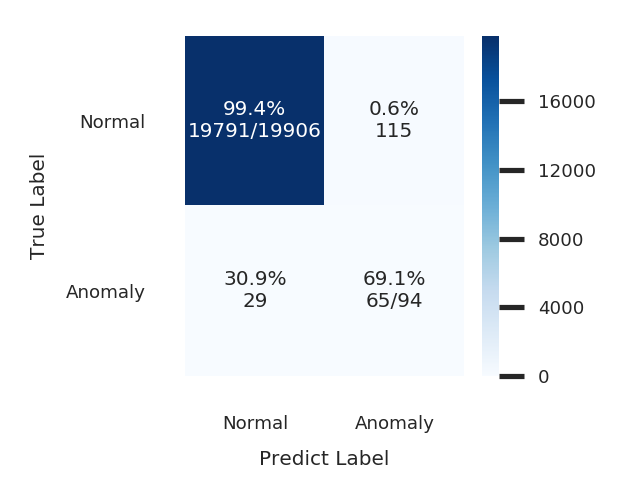

In [14]:
# move threshold from 0.9 to 1 to see the change of fpr, acc and etc.
threshold = 0.99999

accuracy: 0.9954

precision: 0.5081967213114754

recall: 0.6595744680851063

false positive rate: 0.003014166582939817



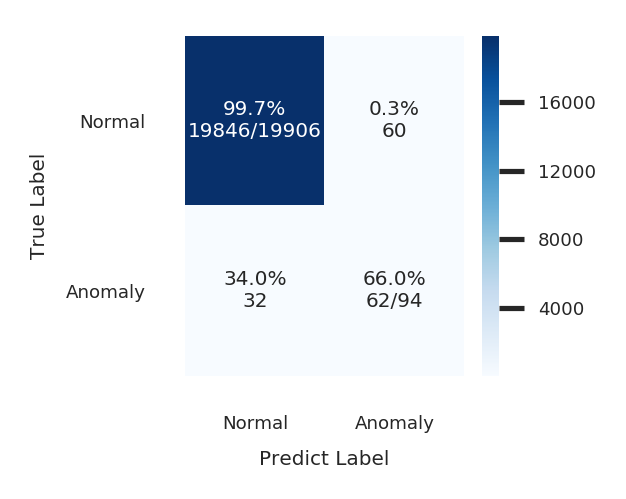

In [15]:
# move threshold from 0.9 to 1 to see the change of fpr, acc and etc.
threshold = 1

## Visualize attention layer

In [16]:
# name list of PM values
pm_list = ['BBE-RS',
            'CV-OTU', 'CV-S',
            'DROPGAINAVG-OTS', 'DROPGAINMAX-OTS_DROPGAINMIN-OTS_-',
            'E-CV', 'E-ES', 'E-INFRAMESERR_E-INFRAMES_/', 'E-OUTFRAMESERR_E-OUTFRAMES_/',
            'E-UAS', 'ES-OTU', 'ES-RS', 'ES-S',
            'OCH-OPRAVG', 'OCH-OPRMAX_OCH-OPRMIN_-', 'OCH-SPANLOSSAVG', 'OCH-SPANLOSSMAX_OCH-SPANLOSSMIN_-',
            'OPINAVG-OTS', 'OPINMAX-OTS_OPINMIN-OTS_-',
            'OPOUTAVG-OTS', 'OPOUTAVG-OTS_OPINAVG-OTS_-', 'OPOUTMAX-OTS_OPOUTMIN-OTS_-',
            'OPRAVG-OCH', 'OPRAVG-OTS', 'OPRMAX-OCH_OPRMIN-OCH_-', 'OPRMAX-OTS_OPRMIN-OTS_-',
            'OPTAVG-OCH', 'OPTAVG-OTS', 'OPTMAX-OCH_OPTMIN-OCH_-', 'OPTMAX-OTS_OPTMIN-OTS_-',
            'ORLAVG-OTS', 'ORLMIN-OTS', 'OTU-CV', 'OTU-ES', 'OTU-QAVG', 'OTU-QSTDEV',
            'PCS-CV', 'PCS-ES', 'PCS-UAS',
            'QAVG-OTU', 'QSTDEV-OTU',
            'RS-BBE', 'RS-ES',
            'S-CV', 'S-ES']

# device list
dev_list = ['AMP', 'ETH10G', 'ETHN', 'ETTP', 'OC192', 'OPTMON', 'OSC', 'OTM', 'OTM2', 'OTUTTP', 'PTP']

In [17]:
def visualize_input_attention(matrix, dev_list, pm_list):
    attn_matrix = pd.DataFrame(data=matrix, index=dev_list, columns=pm_list)
    attn_matrix[attn_matrix == 1] = 0

    return attn_matrix

In [18]:
# diagonal matrix of 11-dim representing 11 device types
test_dev = np.diag(np.ones([11]))
test_dev

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [19]:
# output attentions, attn1 is the input attention and attn2 is the output attention
# attn2 is only works in classification problems
attn_matrix = sess.run(attention_matrix, feed_dict={input_dev: test_dev})

In [21]:
attn_matrix = visualize_input_attention(attn_matrix, dev_list, pm_list)

In [22]:
attn_matrix

,BBE-RS,CV-OTU,CV-S,DROPGAINAVG-OTS,DROPGAINMAX-OTS_DROPGAINMIN-OTS_-,E-CV,E-ES,E-INFRAMESERR_E-INFRAMES_/,E-OUTFRAMESERR_E-OUTFRAMES_/,E-UAS,ES-OTU,ES-RS,ES-S,OCH-OPRAVG,OCH-OPRMAX_OCH-OPRMIN_-,OCH-SPANLOSSAVG,OCH-SPANLOSSMAX_OCH-SPANLOSSMIN_-,OPINAVG-OTS,OPINMAX-OTS_OPINMIN-OTS_-,OPOUTAVG-OTS,OPOUTAVG-OTS_OPINAVG-OTS_-,OPOUTMAX-OTS_OPOUTMIN-OTS_-,OPRAVG-OCH,OPRAVG-OTS,OPRMAX-OCH_OPRMIN-OCH_-,OPRMAX-OTS_OPRMIN-OTS_-,OPTAVG-OCH,OPTAVG-OTS,OPTMAX-OCH_OPTMIN-OCH_-,OPTMAX-OTS_OPTMIN-OTS_-,ORLAVG-OTS,ORLMIN-OTS,OTU-CV,OTU-ES,OTU-QAVG,OTU-QSTDEV,PCS-CV,PCS-ES,PCS-UAS,QAVG-OTU,QSTDEV-OTU,RS-BBE,RS-ES,S-CV,S-ES
AMP,0.0,0.0,0.0,1.158346,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.890101,1.028397,0.989788,1.065428,1.00767,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.957968,1.003101,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ETH10G,0.0,0.0,0.0,0.000000,0.0,0.0,0.772969,0.000000,0.000000,0.789611,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.156539,0.994292,0.0,0.0,0.0,0.0,0.0,0.0
ETHN,0.0,0.0,0.0,0.000000,0.0,0.0,1.319919,0.936376,1.018393,0.999299,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.966049,1.008819,0.912045,0.0,0.0,0.0,0.0,0.0,0.0
ETTP,0.0,0.0,0.0,0.000000,0.0,0.0,0.736273,0.936102,0.000000,1.127190,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.165472,0.925769,1.111431,0.0,0.0,0.0,0.0,0.0,0.0
OC192,0.0,0.0,0.0,0.000000,0.0,0.0,0.827963,0.909076,0.000000,0.845325,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.907045,0.919010,0.0,0.0,0.0,0.0,0.0,0.0
OPTMON,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.95065,0.000000,1.023695,0.0,0.899556,0.0,0.870336,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
OSC,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.872742,0.996199,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
OTM,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.966903,1.074923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.841379,0.00000,0.904473,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.956160,1.116704,0.966257,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
OTM2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.345439,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
OTUTTP,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.821072,1.069525,1.009606,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
